## Stock Market Prediction with comparative analysis of Linear Regression, KNN and LSTM.



Predicting how the stock market will perform is one of the most difficult things to do. There are so many factors involved in the prediction – physical factors vs. psychological, rational and irrational behavior, etc. All these aspects combine to make share prices volatile and very difficult to predict with a high degree of accuracy. Using features like the latest announcements about an organization, their quarterly revenue results, etc., machine learning techniques have the potential to unearth patterns and insights we didn’t see before, and these can be used to make unerringly accurate predictions. I have implemented a machine learning algorithms to predict the future stock price of TATAGLOBAL company using linear regression, KNN and LSTM.

## Using Linear Regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [66]:
dataset = pd.read_csv("NSE-TATAGLOBAL11.csv")

There are multiple variables in the dataset – date, open, high, low, last, close, total_trade_quantity, and turnover.
* The columns Open and Close represent the starting and final price at which the stock is traded on a particular day.
* High, Low and Last represent the maximum, minimum, and last price of the share for the day.  
* Total Trade Quantity is the number of shares bought or sold in the day and Turnover (Lacs) is the turnover of the particular company on a given date.


In [67]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


Another important thing is that the market is closed on weekends and public holidays. Notice the above table again, some date values are missing – 2/10/2018, 6/10/2018,
7/10/2018. Of these dates, 2nd is a national holiday while 6th and 7th fall on a weekend.

In [68]:
x = dataset[['High','Low','Open','Total Trade Quantity']].values

In [69]:
y = dataset['Close'].values

The profit or loss calculation is usually determined by the closing price of a stock for the day, hence we considered the closing price as the target variable.

In [70]:
# splitting x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [71]:
regressor = LinearRegression()

In [72]:
regressor.fit(x_train, y_train)

LinearRegression()

In [73]:
# making predictions on the testing set
predicted = regressor.predict(x_test)

In [74]:
print(predicted)

[152.66868039 222.06418483 153.15591516 132.86020316 315.98094891
 122.8971619  163.17333265 127.22060284 141.48536073 161.95824254
 171.56722021 118.58231288 119.64101604 158.00614483 232.23783105
 120.55289197 243.88014705 303.7363437  154.33167176 160.46645321
 256.58264184 137.68996277 141.83010801 142.15745062 176.16426181
 126.08042276 153.04318564 131.95766307 118.63718415 108.9160029
 143.03194789 153.40761035 103.5375959  246.1054607  155.48167715
 146.04940999 135.21084774 277.8364117  124.15428489 131.87197113
 150.62665123 122.63364624 234.32168226 142.76706088 121.74420385
 152.62240142 149.51807396 169.48339371 276.62794896 119.4510858
 236.76173423 140.45209611 159.62681416 120.58653818 158.39165032
 137.26813633 155.8096123  155.27553928 139.7030553  124.96962538
 138.93598643 116.91345962 274.75281083 143.94581051 142.60859766
 137.74236462 155.54185621 234.04965372 154.27923476 146.66196288
 162.34636113 144.07158563 139.32788916 118.29652765 118.47875401
 238.3590278

In [75]:
dframe = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':predicted.flatten()})

In [76]:
dframe.head(50)

,Actual,Predicted
0,153.45,152.668680
1,222.95,222.064185
2,152.95,153.155915
3,132.60,132.860203
4,317.60,315.980949
5,122.40,122.897162
6,160.35,163.173333
7,128.00,127.220603
8,141.20,141.485361
9,162.20,161.958243


In [77]:
graph = dframe.head(25)

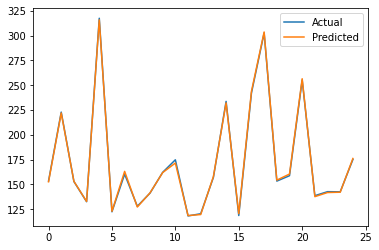

In [78]:
graph.plot()

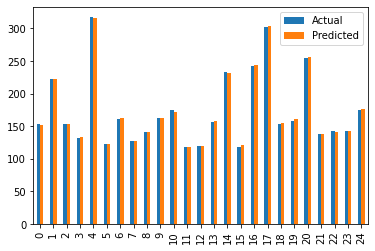

In [79]:
graph.plot(kind='bar')

## Using Regression future trend predict

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable. 

The equation for linear regression can be written as: Y = θ1X1 + θ2x2 + θnxn 

Here, x1, x2,….xn represent the independent variables while the coefficients θ1, θ2, …. θn represent the weights. 

Here, we do not have a set of independent variables. We have only the dates instead. Let us use the date column to extract features like – day, month, year, mon/fri etc. and then fit a linear regression model.

In [80]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv("NSE-TATAGLOBAL11.csv")

#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


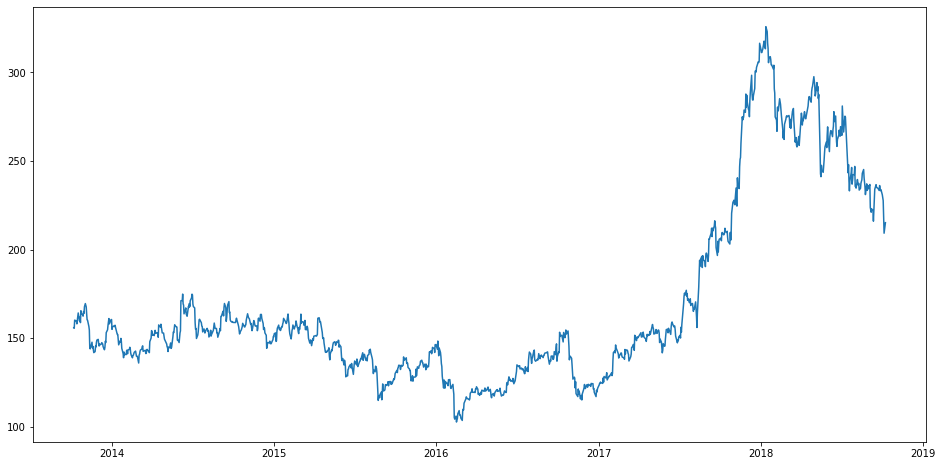

In [81]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

Firstly, sort the dataset in ascending order and then create a separate dataset so that any new feature created does not affect the original data.

In [82]:
#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [83]:
#create features
from fastai.tabular.core import add_datepart
#from fastai import add_datepart

add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
#print(new_data)

In [84]:
new_data['mon_fri'] = 0
#print(new_data)
# disable chained assignments
pd.options.mode.chained_assignment = None 
for i in range(0,len(new_data)):
    if (new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0
print(new_data)

       Close  Year  Month  Week  Day  Dayofweek  Dayofyear  Is_month_end  \
0      155.8  2013     10    41    8          1        281         False   
1     155.55  2013     10    41    9          2        282         False   
2     160.15  2013     10    41   10          3        283         False   
3     160.05  2013     10    41   11          4        284         False   
4     159.45  2013     10    42   14          0        287         False   
...      ...   ...    ...   ...  ...        ...        ...           ...   
1230   230.9  2018     10    40    1          0        274         False   
1231   227.6  2018     10    40    3          2        276         False   
1232   218.2  2018     10    40    4          3        277         False   
1233   209.2  2018     10    40    5          4        278         False   
1234  215.15  2018     10    41    8          0        281         False   

      Is_month_start  Is_quarter_end  Is_quarter_start  Is_year_end  \
0              F

In [94]:
#split into train and validation
train = new_data[:1234]
valid = new_data[1:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [95]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

39.8288124592021

**Root Mean Square Error (RMSE): 123.88**

In [96]:
#print(preds)
dframe1 = pd.DataFrame({'Actual':y_valid, 'Predicted':preds})
dframe1.head(5)

,Actual,Predicted
1,155.55,116.659944
2,160.15,116.589308
3,160.05,116.910056
4,159.45,116.995791
5,158.05,116.533771


In [97]:
dframe1.tail(5)

,Actual,Predicted
1230,230.9,219.070110
1231,227.6,225.367712
1232,218.2,225.297076
1233,209.2,225.617824
1234,215.15,225.703559


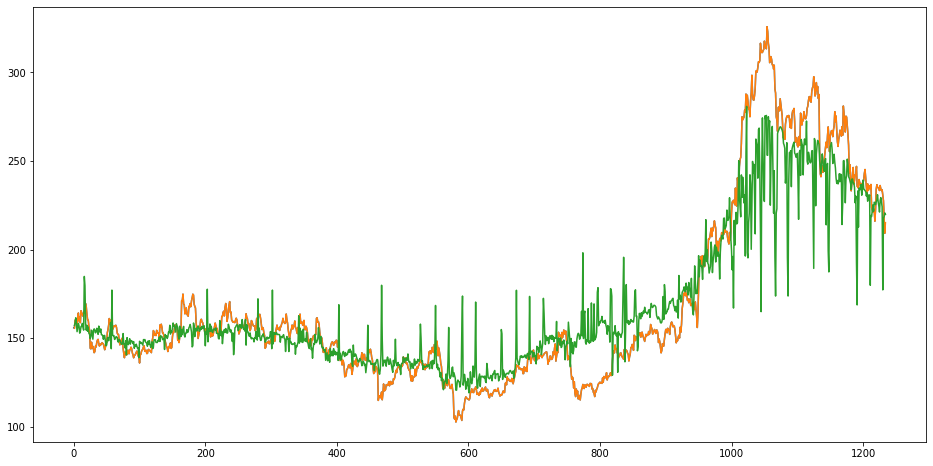

In [110]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[1:].index
train.index = new_data[:1234].index

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])


## Using KNN 

Based on the independent variables, kNN finds the similarity between new data points and old data points.

In [99]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [101]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)
#plt.plot(preds)

In [102]:
print(y_valid)

1       155.55
2       160.15
3       160.05
4       159.45
5       158.05
         ...  
1230     230.9
1231     227.6
1232     218.2
1233     209.2
1234    215.15
Name: Close, Length: 1234, dtype: object


In [103]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

20.745034561562136

**Root Mean Square Error (RMSE): 106.65**

In [104]:
dframe2 = pd.DataFrame({'Actual':y_valid, 'Predicted':preds})

In [105]:
dframe2.head(10)

,Actual,Predicted
1,155.55,157.135714
2,160.15,158.664286
3,160.05,161.471429
4,159.45,158.271429
5,158.05,153.642857
6,162.0,156.057143
7,164.2,158.371429
8,159.6,156.814286
9,161.85,152.8
10,158.75,153.8


In [107]:
dframe2.tail(10)

,Actual,Predicted
1225,233.3,221.142857
1226,236.1,227.657143
1227,234.25,229.285714
1228,233.25,226.635714
1229,233.75,224.15
1230,230.9,177.221429
1231,227.6,217.764286
1232,218.2,218.571429
1233,209.2,220.678571
1234,215.15,219.807143


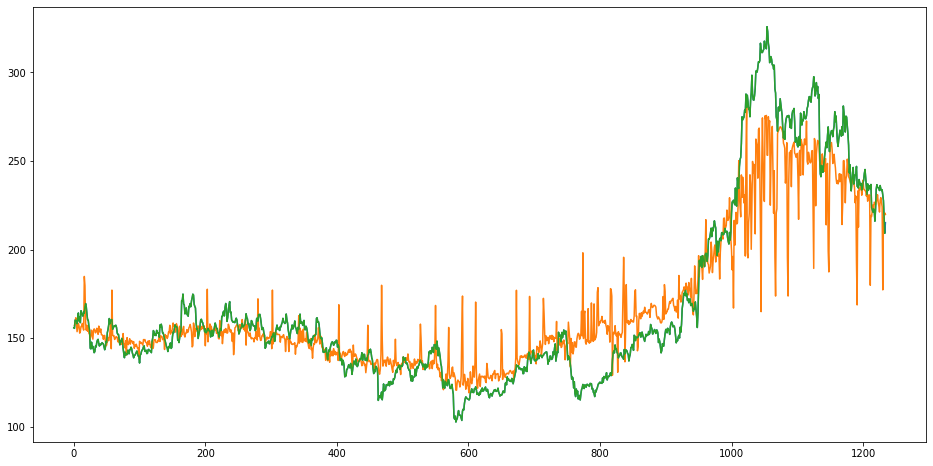

In [108]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

plt.figure(figsize=(16,8))
plt.plot(valid[['Close', 'Predictions']])
plt.plot(train['Close'])



## Using LSTM (Long Short Term Memory) 

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. LSTM has three gates: 
* The input gate: The input gate adds information to the cell state 
* The forget gate: It removes the information that is no longer required by the model 
* The output gate: Output Gate at LSTM selects the information to be shown as output

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

In [ ]:
train = dataset[0:960,:]
valid = dataset[960:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting testing values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

900/900 - 26s - loss: 9.2637e-04 - 26s/epoch - 28ms/step


In [ ]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

16.6003041620881

**Root Mean Square Error (RMSE): 8.93**

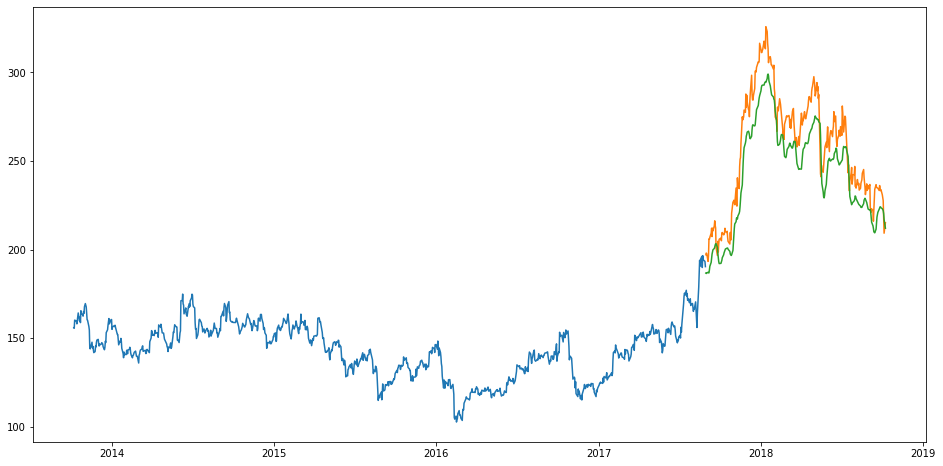

In [ ]:
#for plotting
train = new_data[:960]
valid = new_data[960:]
valid['Predictions'] = closing_price

plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [ ]:
dframe3 = pd.DataFrame({'Actual':valid['Close'], 'Predicted':valid['Predictions']})

In [ ]:
dframe3.head(50)

,Actual,Predicted
Date,,
2017-08-30,197.05,186.694031
2017-08-31,198.0,186.479340
2017-09-01,197.6,186.753006
2017-09-04,193.3,187.152283
2017-09-05,196.7,186.844986
2017-09-06,205.95,186.816071
2017-09-07,205.75,188.433411
2017-09-08,206.9,190.540619
2017-09-11,209.25,192.755051


In [ ]:
dframe3.tail(50)

,Actual,Predicted
Date,,
2018-07-24,246.3,225.285995
2018-07-25,236.9,226.244080
2018-07-26,239.1,226.402588
2018-07-27,242.25,226.684631
2018-07-30,242.2,227.545929
2018-07-31,246.9,228.520264
2018-08-01,235.65,230.232437
2018-08-02,235.45,229.927490
2018-08-03,234.65,228.743805


**By comparing RMSE values of all three algorithms, we can say that LSTM performs well in prediction as its RMSE value is very less than that of linear regression and KNN. Also from the above graphs, we can clearly see that LSTM identifies the future trend correctly.**